# Price Channels

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AAPL'
start = '2020-12-01'
end = '2023-04-01'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-01 00:00:00-05:00,121.010002,123.470001,120.010002,122.720001,121.079437,127728200
2020-12-02 00:00:00-05:00,122.019997,123.370003,120.889999,123.080002,121.434631,89004200
2020-12-03 00:00:00-05:00,123.519997,123.779999,122.209999,122.940002,121.296501,78967600
2020-12-04 00:00:00-05:00,122.599998,122.860001,121.519997,122.250000,120.615715,78260400
2020-12-07 00:00:00-05:00,122.309998,124.570000,122.250000,123.750000,122.095665,86712000


In [3]:
df['Upper_Channel_Line'] = df['High'].rolling(20).max()
df['Lower_Channel_Line'] = df['Low'].rolling(20).min()
df['Centerline'] = (df['Upper_Channel_Line'] + df['Lower_Channel_Line']) / 2

In [4]:
df = df.dropna()
df.head()

,Open,High,Low,Close,Adj Close,Volume,Upper_Channel_Line,Lower_Channel_Line,Centerline
Date,,,,,,,,,
2020-12-29 00:00:00-05:00,138.050003,138.789993,134.339996,134.869995,133.067001,121047300,138.789993,120.010002,129.399998
2020-12-30 00:00:00-05:00,135.580002,135.990005,133.399994,133.720001,131.932373,96452100,138.789993,120.150002,129.469997
2020-12-31 00:00:00-05:00,134.080002,134.740005,131.720001,132.690002,130.916138,99116600,138.789993,120.150002,129.469997
2021-01-04 00:00:00-05:00,133.520004,133.610001,126.760002,129.410004,127.679993,143301900,138.789993,120.150002,129.469997
2021-01-05 00:00:00-05:00,128.889999,131.740005,128.429993,131.009995,129.258591,97664900,138.789993,120.150002,129.469997


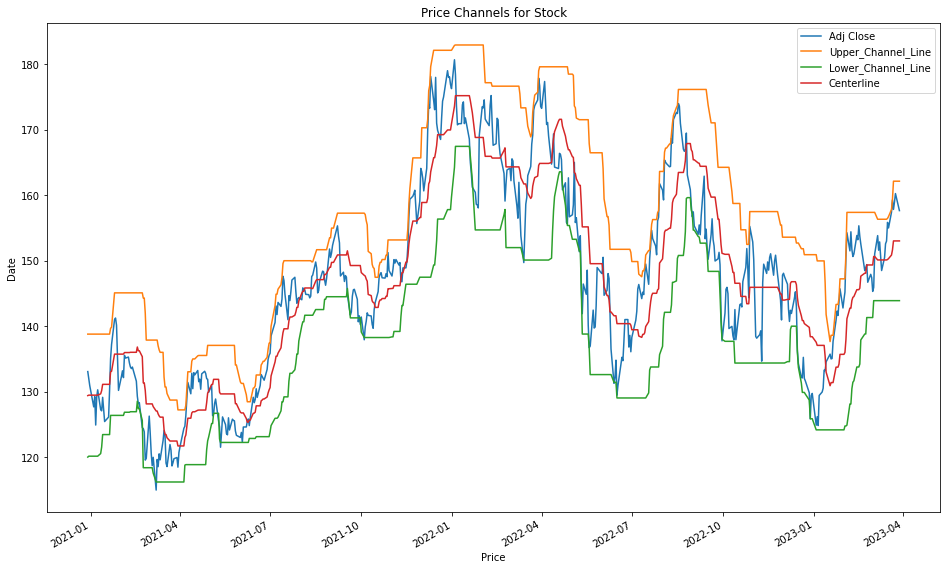

In [5]:
df[['Adj Close','Upper_Channel_Line','Lower_Channel_Line','Centerline']].plot(figsize=(16,10))
plt.title('Price Channels for Stock')
plt.legend(loc='best')
plt.xlabel('Price')
plt.ylabel('Date')
plt.show()

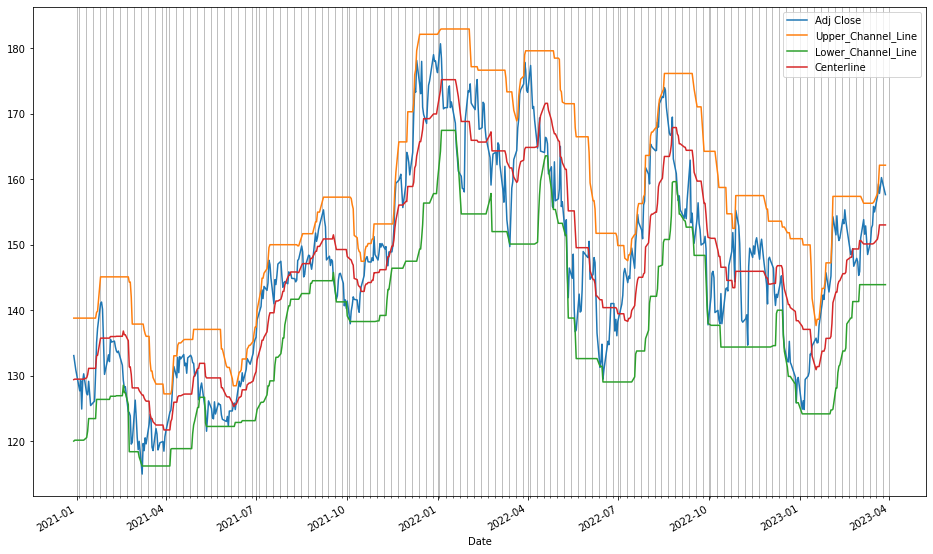

In [6]:
ax = df[['Adj Close','Upper_Channel_Line','Lower_Channel_Line','Centerline']].plot(figsize=(16,10))
xtick = pd.date_range( start=df.index.min(), end=df.index.max(), freq='W')
ax.set_xticks(xtick, minor=True )
ax.grid('on', which='minor', axis='x')
ax.grid('off', which='major', axis='x')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


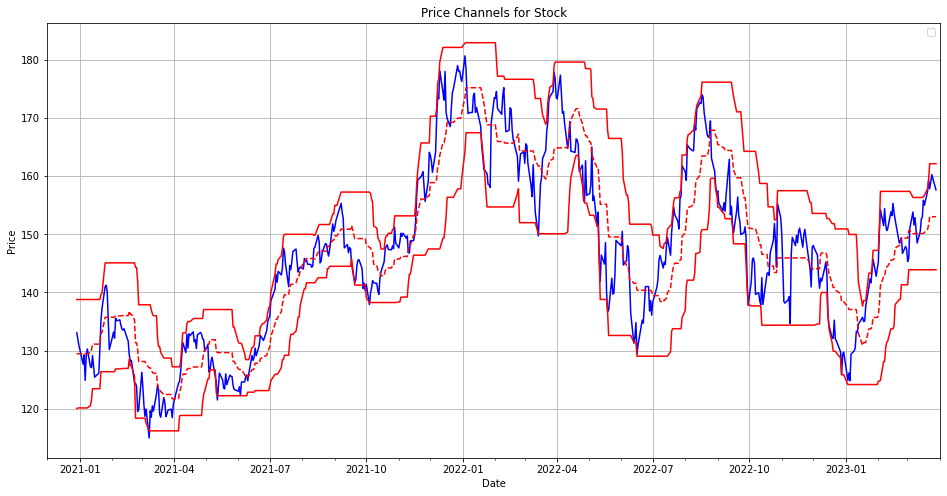

In [7]:
import matplotlib.dates as mdates

months = mdates.MonthLocator()  # every month

fig, ax = plt.subplots(figsize=(16,8))
datemin = np.datetime64(df.index[0], 'M')
datemax = np.datetime64(df.index[-1], 'M') + np.timedelta64(1, 'M')
ax.set_xlim(datemin, datemax)

ax.plot(df.index, df['Adj Close'], color='blue')
ax.plot(df.index, df['Upper_Channel_Line'], color='red')
ax.plot(df.index, df['Lower_Channel_Line'], color='red')
ax.plot(df.index, df['Centerline'], color='red', linestyle='--')
ax.xaxis.set_minor_locator(months)
ax.grid(True)

ax.set_title('Price Channels for Stock')
ax.set_ylabel('Price')
ax.set_xlabel('Date')
ax.legend(loc='best')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


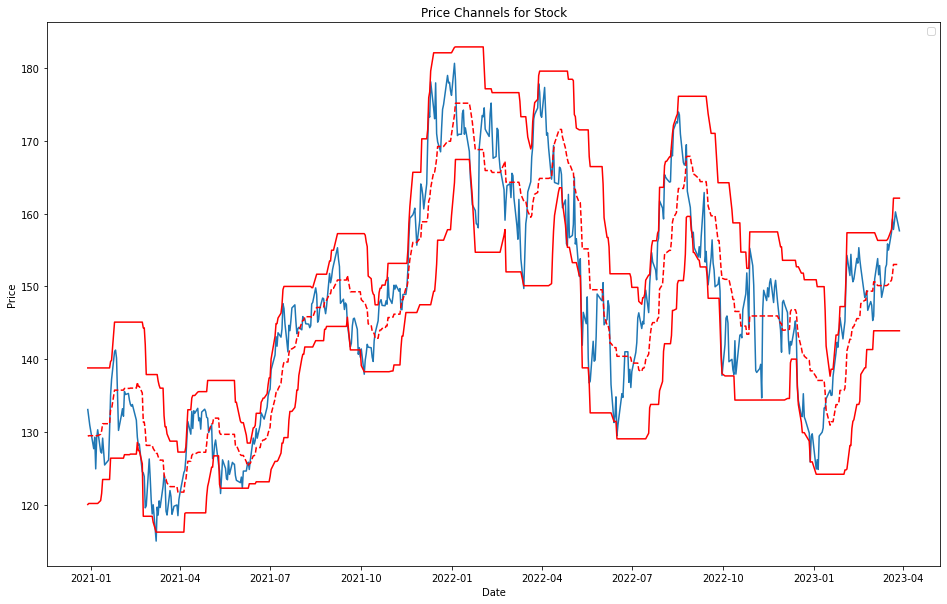

In [8]:
plt.figure(figsize=(16,10))
plt.plot(df['Adj Close'])
plt.plot(df['Upper_Channel_Line'], color='r')
plt.plot(df['Lower_Channel_Line'], color='r')
plt.plot(df['Centerline'], color='r', linestyle='--')
plt.title('Price Channels for Stock')
plt.legend(loc='best')
plt.ylabel('Price')
plt.xlabel('Date')
plt.show()